<h1><center>Multi-Period Demand Response Management</center></h1>


# 1. Stackelberg Game 
Let $\scr{K}=\{1,2,\dots,K\}$ be the set of companies, $\scr{N}=\{1,2,\dots,N\}$ be the set of consumers, and $\scr{T}=\{1,2,\dots,T\}$ be the finite set of time slots.

We formulate a static Stackelberg game between companies (the leaders) and their consumers (the followers) to find revenue maximizing prices and optimal demands. In Stackelberg games, the leader(s) first announce their decisions to the follower(s), and then the followers respond. In our game, the leaders send price signals to the consumers, who respond optimally by choosing their demands. To capture the  market competition between the companies, we let them play a price-selection Nash game. The equilibrium point of the price-selection game is what companies announce to their consumers.




## 1.1 Consumer-Side 

Each energy consumer $n\in \scr{N}$ receives all price signals from each company $k\in \scr{K}$ at each time slot $t\in \scr{T}$ and aims to select his corresponding utility-maximizing demand $d_{n,k}(t)\geq0$ for each time slot from each company, subject to budget and energy need constraints. Denote company $k$'s price at time $t$ by $p_k(t)$. Let $B_n \geq 0$  and $E^{{\rm min}}_n \geq 0$ denote, respectively, consumer $n$'s budget and minimum energy need for the entire time-horizon. The utility of consumer $n$ is defined as 
$$ U_{{\rm consumer},n}=\gamma_n\sum_{k\in \scr{K}}\sum_{t\in \scr{T}}\ln(\zeta_n+d_{n,k}(t))$$
where $\gamma_n$ and $\zeta_n\geq1$ are consumer specific parameters. Consumer $n$ aims to achieve the highest payoff while meeting the threshold of minimum amount of energy and not exceeding a certain budget. To be more precise,
given $B_n \geq 0$, $E^{{\rm min}}_n \geq 0$, and $p_k(t)>0$, the consumer-side optimization problem is formulated as follows:

\begin{eqnarray}&{\text{maximize}}   \ \ \ \ \ & U_{{\rm consumer},n}, \\
 &\text{subject to} &   \ \sum_{k\in \scr{K}}\sum_{t\in \scr{T}}p_k(t)d_{n,k}(t)\leq B_n \\
&&\sum_{k\in \scr{K}}\sum_{t\in \scr{T}}d_{n,k}(t)\geq \,E^{{\rm min}}_n, \\
&& d_{n,k}(t)\geq 0,\;\;   \\
&& \text{for each } \ t \in \scr{T}, \ k \in \scr{K} \end{eqnarray}

For the remaining of this notebook, we let $\zeta_n=\gamma_n=1$ for each $n$.

## 1.2 Company-Side 

Letting ${\bf{p_{-k}}}$ denote the prices set by other companies, the total revenue for company $k$ is given by

$$U_{{\rm company},k}=\sum_{t\in \scr{T}}p_k(t)\sum_{n\in \scr{N}}d_{n,k}(p_k,{\bf{p_{-k}}},t).$$

Given the power availability of UC $k$ at period $t$, denoted by $G_k(t)$, and for a fixed ${\bf{p_{-k}}}$, company $k$'s problem is


\begin{eqnarray}&{\text{maximize}}   \ \ \ \ \ & U_{{\rm company},k} (p_k,{\bf{p_{-k}}}), \\
&\text{subject to} &   \ \sum_{n\in \scr{N}} d_{n,k}(p_k,{\bf{p_{-k}}},t) \leq G_k(t) \\
&& p_k(t)> 0, \\
&& \text{for each } \ t \in \scr{T}. \end{eqnarray}

  The goal of each company is to maximize its revenue and hence maximize its profit. Additionally, because of the market competition, the prices announced by other companies also affect the determination of the price at company $k$. Thus, company $k$'s price selection is actually a response to what other competitors in the market have announced; this response is also constrained by the availability of power. Thus, what we have is a Nash game among the utility companies.

<b> In this notebook, we numerically implement the closed-form solutions and algorithm discussed in [Alshehri et. al.] for various scenarios.

In [ ]:
#Calling the necessary libraries 
#导入要用到的软件包
import numpy as np #NumPy 是一个运行速度非常快的数学库，主要用于数组计算，包含：一个强大的N维数组对象 ndarray；广播功能函数；整合 C/C++/Fortran 代码的工具线性代数、傅里叶变换、随机数生成等功能
import scipy.io #SciPy 包含的模块有最优化、线性代数、积分、插值、特殊函数、快速傅里叶变换、信号处理和图像处理、常微分方程求解和其他科学与工程中常用的计算。
import matplotlib.pyplot as plt #Matplotlib 可以绘制线图、散点图、等高线图、条形图、柱状图、3D 图形、甚至是图形动画等等。
import pandas as pd #Pandas 一个强大的分析结构化数据的工具集，基础是 Numpy（提供高性能的矩阵运算）。可以从各种文件格式比如 CSV、JSON、SQL、Microsoft Excel 导入数据。可以对各种数据进行运算操作，比如归并、再成形、选择，还有数据清洗和数据加工特征。
from matplotlib import rc #导入模块成员
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']}) #matplotlib.pyplot.rc()函数用于设置rc参数。
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
%matplotlib inline  

<b>Now, we define the optimal demand functions $d^*_{n,k}(t)$ and prices $p^*_{k}(t)$, and other necessary functions. <b>


计算需求（10）
$$d_{n,k}^*(t) = \frac{{{B_n} + \sum\nolimits_{j \in K} {\sum\nolimits_{h \in T} {{p_j}(h){\zeta _n}} } }}{{KT{p_k}(t)}}$$
价格计算（14）
$$\begin{array}{l}
p_k^*\left( k \right) = \frac{B}{{{G_k}(t) + Z}}\left( {\frac{1}{{KT - \sum\nolimits_{j \in K} {\sum\nolimits_{h \in T} {\frac{Z}{{{G_j}(h) + Z}}} } }}} \right)\\
where  {\rm{B}} = \sum\nolimits_{{\rm{n}} \in N} {{B_n}} \begin{array}{*{20}{c}}
{}&{}and{}&{}
\end{array}Z = \sum\nolimits_{n \in N} {{\zeta _n}} 
\end{array}$$
计算消费者效用（3）
$${u_n}\left( {{d_n}} \right) = {\gamma _n}\sum\limits_{k \in K} {\sum\limits_{t \in T} {\ln \left( {{\zeta _n} + {d_{n,k}}\left( t \right)} \right)} } $$
公司k收入函数（16）
$${\pi _k}({G_k},{G_{ - k}}) = \sum\limits_{t \in T} {p_{\rm{k}}^*(t){G_k}(t)} $$
假设：$${\gamma _n} = {\zeta _n} = 1$$

In [ ]:
# In this cell, we only define the functions 

# Denote the number of consumers by N, the number of utility companies by K, and the number of periods by T. 
# We take \zeta_n's and \gamma_n's to be 1 for all consumers 
# 我们让所有消费者的\zeta n和\gamma n都为1
# 用N表示消费者数量，用K表示公用事业公司数量，用T表示周期数量。


def d(n,k,t):#需求计算
    
    y=(B[n-1]+np.sum(P))/(K*T*P[k-1,t-1])-1    
    
    return y

def p(k,t):#价格计算
    
    y=(np.sum(B)/(G[k-1,t-1]+N))*(1/(K*T-np.sum(N/(G+N))))   
    
    return y

def Un(n):#计算消费者效用
    
    demand=np.zeros((K,T))#numpy.zeros 创建指定大小的数组，数组元素0来填充：创建一个K行T列的二维数组
    for i in range(T):#range() 返回的是一个可迭代对象（类型是对象）：从0迭代到T-1（下同）
        for j in range(K):
            demand[j,i]=d(n,j,i)#计算消费者需求，结果放入数组demand中
    
    y=np.sum(np.log(1+demand))#计算消费者效用（式三），demand中每一项加一然后分别求自然对数最后求和，得到消费者效用。
    
    return y

def Uk(k):#计算公司收入
    
    demand=np.zeros((N,T))
    for i in range(T):#range() 返回的是一个可迭代对象（类型是对象）
        for j in range(N):
            demand[j,i]=d(j,k,i)

    demand_t=np.zeros(T)
    for i in range(T):
        demand_t[i]=np.sum(demand[:,i])#[:,1]（切片操作）;对第i+1列元素求和，结果唯一个一维数组放在demand_t中

    y=np.dot(P[k-1,:],demand_t)#计算公司价格；用P数组的k-1行乘以demand_t数组再求和

    return y

## 2. Case Study: EcoGrid EU

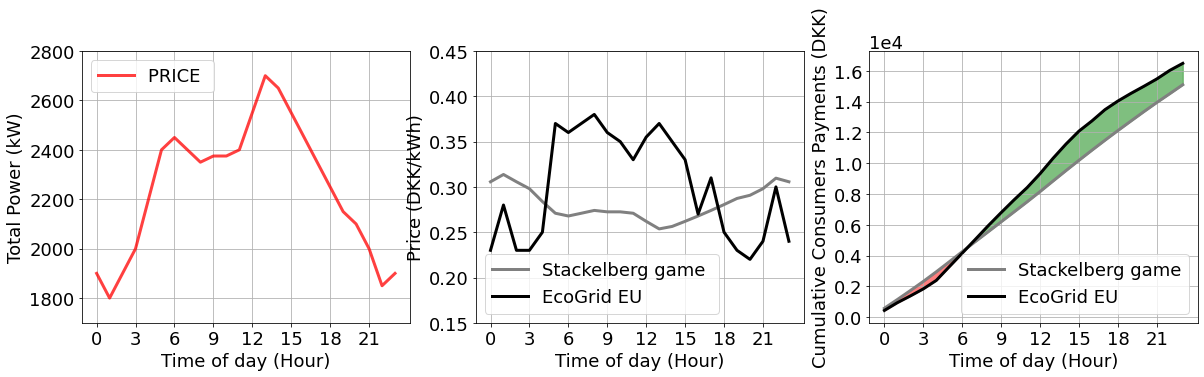

In [ ]:
T,N,K=24,2000,1   # 用N表示消费者数量，用K表示公用事业公司数量，用T表示周期数量。
B,G,P,P_Eco,Payment_Eco,Payment_Stackelberg=np.zeros(N),np.zeros((K,T)),np.zeros((K,T)),np.zeros((K,T)),np.zeros((T)),np.zeros((T))


# Flexible Power from EcoGrid 
G=([1900,1800,1900,2000,2200,2400,2450,2400,2350,2375,2375,2400,2550,2700,2650,2550,2450,2350,2250,2150,2100,2000,1850,1900])
G=np.reshape(G,(K,T))#改变数组形状；一维数组改为K行T列数组

# Prices from EcoGrid 
P_Eco=([230,280,230,230,250,370,360,370,380,360,350,330,355,370,350,330,270,310,250,230,220,240,300,240])
P_Eco=np.reshape(P_Eco,(K,T))/1000#计算最小需求

E_total=np.sum(G)#计算总电量

# Find necessary budgets from Theorem 1
B[0:N]=(((E_total/N+K*T)/np.sum(1/(K*T*P_Eco)))-np.sum(P_Eco))

plt.figure(figsize=(20,5))# 创建一个 20 * 5 点（point）的图，    

# Visualizing power
ax = plt.subplot(131)#在总画布上创建窗口（1号位置）
#等价于plt.subplot(nrows=1, ncols=3, index=1)在总画布上划分成1x3的网格从到上到右下依次编号1-n

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    

   
  
# plt.plot(G[0,:],color='g',label='Power availability',linewidth=3)
plt.plot(G[0,:],color='r',label='PRICE ',linewidth=3,alpha=0.75)#设置画图的颜色，线宽和透明度并且画图
plt.grid(True) #设置显示网格   
plt.ylabel('Total Power (kW)',fontsize=18)#设置Y轴标题和字体大小
plt.xlabel('Time of day (Hour)',fontsize=18)#设置X轴标题和字体大小
# plt.legend(fontsize=15,loc='best')
plt.ylim(np.min(G)-100,np.max(G)+100)#设置Y轴的上下限
plt.xticks(np.arange(0, T, 3))#设置X轴的坐标轴
plt.xticks(fontsize=18) #设置X轴字体大小   
plt.yticks(fontsize=18) #设置Y轴字体大小 
plt.legend(fontsize=18,loc='best')#在轴上放置图例



# Optimal Prices 
for t in range(T):#计算最优价格
    for k in range(K):#循环调用计算价格函数
        P[k,t]=p(k+1,t+1)

# Visualizing prices（价格可视化）
ax = plt.subplot(132)#在总画布上创建窗口（2号位置）

plt.ylim(0.15,.45)#设置Y轴的上下限
plt.xticks(np.arange(0, T, 3))#设置X轴的坐标轴
plt.xticks(fontsize=18) #设置X轴字体大小  
plt.yticks(fontsize=18) #设置Y轴字体大小 
  

plt.plot(P[0,:],color='grey',label='Stackelberg game ',linewidth=3)#设置颜色，标签和线宽并画图
plt.plot(P_Eco[0,:],color='k',label='EcoGrid EU',linewidth=3,alpha=1)#设置颜色，标签，线宽和不透明度并画图
plt.grid(True)  #设置显示网格  
plt.ylabel('Price (DKK/kWh)',fontsize=18)#设置Y轴标题和字体大小
plt.xlabel('Time of day (Hour)',fontsize=18)#设置X轴标题和字体大小
plt.legend(fontsize=18,loc='best')#在轴上放置图例



# Visualizing savings 


ax = plt.subplot(133)#在总画布上创建窗口（3号位置）

k=0
for t in range(T):
        Payment_Stackelberg[t]=p(k+1,t+1)*G[k,t]+Payment_Stackelberg[t-1]#更新电量需求
        Payment_Eco[t]=P_Eco[k,t]*G[k,t]+Payment_Eco[t-1]#更新价格
  
i=np.zeros([T])
for j in range(T):
    i[j]=j
        
plt.plot(Payment_Stackelberg[:],color='grey',label='Stackelberg game',linewidth=3)#设置画图的颜色，线宽和透明度并且画图
plt.plot(Payment_Eco[:],color='k',label='EcoGrid EU',linewidth=3)#设置画图的颜色，线宽和透明度并且画图

#填充两条水平曲线之间的区域
ax.fill_between(i,Payment_Eco,Payment_Stackelberg, where=Payment_Eco >= Payment_Stackelberg, alpha=0.5, color='green')
ax.fill_between(i,Payment_Eco,Payment_Stackelberg, alpha=0.5,where=Payment_Eco <= Payment_Stackelberg, color='red')

plt.ylabel('Cumulative Consumers Payments (DKK)',fontsize=18)#设置Y轴标题和字体大小
plt.xlabel('Time of day (Hour)',fontsize=18)#设置X轴标题和字体大小
plt.xticks(np.arange(0, T, 3))#设置X轴的坐标轴
plt.xticks(fontsize=18) #设置X轴的字体   
plt.yticks(fontsize=18) #设置Y轴的坐标轴
plt.legend(fontsize=18,loc='best')#在轴上放置图例
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))#配置默认情况下用于线性轴的标量格式化程序：配置Y轴为科学计数法风格（m，n）科学记数法仅用于范围之外的数字 10m到 10n
ax.yaxis.offsetText.set_fontsize(18)#设置科学计数法后缀字体大小

plt.grid(True)#显示网格    

np.sum(Payment_Eco)/np.sum(Payment_Stackelberg)
plt.savefig('EcoGridEU_Price_Power.pdf')#保存图像为PDF


## 2.1 Influence of the Number of Periods

Next, we make consumers heterogeneous and increase the number of companies. We differentiate between consumers by varying their budgets, and take 5 classes of consumers, as in the EcoGrid EU experiment. We let consumers’ budgets be B1−400 = 4 DKK, B401−800 = 5 DKK, B801−1200 = 6 DKK, B1201−1600 = 7 DKK, and B1601−2000 = 8 DKK. We also let
the number of companies be K = 4, which is consistent with he actual energy sources used in the experiment. Precisely,
the system is powered by 61% wind energy (k = 1), 27%
biomass (k = 2), 9% solar energy (k = 3), and 3% biogas
(k = 4). We split the total need (54 MWh) among the energy
sources according to experimental proportions, assuming that
each energy source is owned by a single company that acts as
a company in our game.

With the above setup, we study the effect of varying the
number of periods T from 1 to 50. To do this, we need to
find a way for companies to allocate their total power across
the time horizon for each fixed T, which can be done by
using Theorem 3, which states that equally splitting the total
power across the time horizon for each company k constitutes
a unique Nash equilibrium for the power allocation game (it
is also shown to be the global maximizer in the proof).

接下来，我们让消费者异质化，增加公司的数量。 我们通过不同的预算来区分消费者，并将消费者分为5类，就像在EcoGrid EU实验中一样。 我们让消费者的预算为B1−400 = 4 DKK, B401−800 = 5 DKK, B801−1200 = 6 DKK, B1201−1600 = 7 DKK, B1601−2000 = 8 DKK。 我们还设公司数为K = 4，这与实验中实际使用的能源一致。 准确地说，该系统由61%的风能(k = 1)、27%的生物质能(k = 2)、9%的太阳能(k = 3)和3%的沼气(k = 4)提供动力。我们根据实验比例将总需求(54 MWh)分配给各种能源，假设每种能源都由一个公司拥有，该公司在我们的游戏中扮演一个公司的角色。  
 
通过上述设置，我们研究了将周期T从1到50的变化的效果。 为此，我们需要找到一种方法，让公司为每个固定T在时间范围内分配他们的总权力，这可以通过定理3来实现，定理3指出，在时间范围内平均分配每个公司k的总权力构成了权力分配博弈的唯一纳什均衡(在证明中也显示为全局最大化)。 


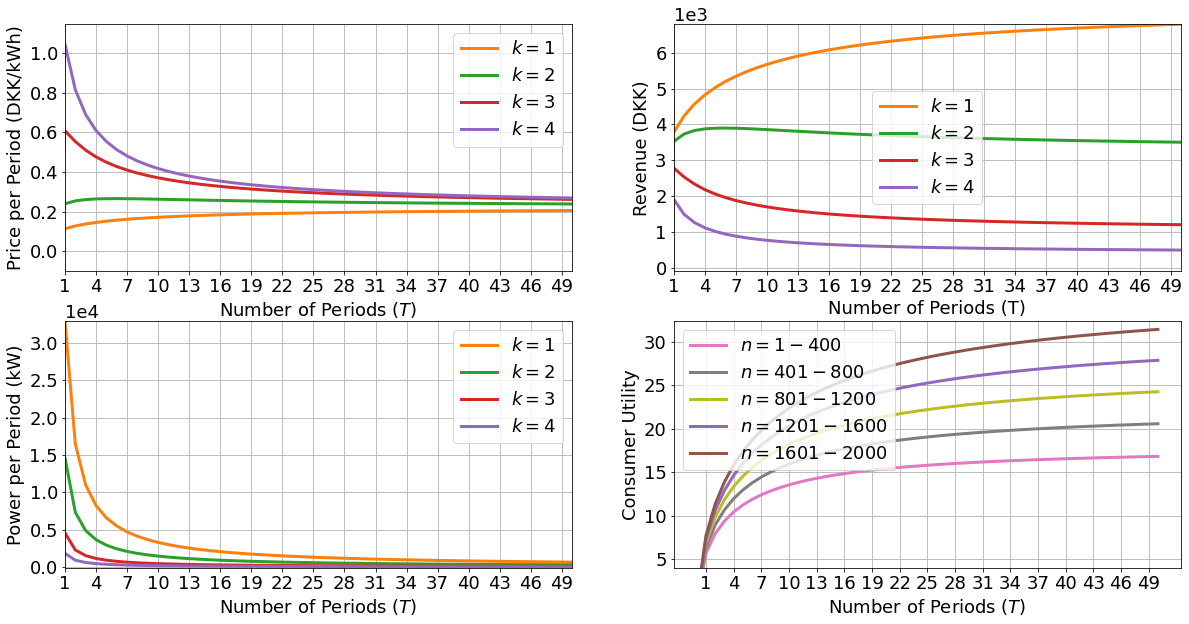

In [ ]:

 # # We study the influence of the number of periods at the NW of 
N=2000#设置消费者集
K=4#公司设置为4个
B=np.zeros(N)
Max_T=50#周期数变为50
Utility=np.zeros((Max_T+1,N))
Revenue=np.zeros((Max_T+1,K))
Prices_NE=np.zeros((Max_T+1,K))
Power_NE=np.zeros((Max_T+1,K))
E_total=np.sum(([1900,1800,1900,2000,2200,2400,2450,2400,2350,2375,2375,2400,2550,2700,2650,2550,2450,2350,2250,2150,2100,2000,1850,1900]))

for i in range(Max_T+1):
  if i==0:
    continue
  T=i
  G=np.zeros((K,T))
  P=np.zeros((K,T))
  #设定消费者预算
  B[0:400],B[400:800],B[800:1200],B[1200:1600],B[1600:2000]=4,5,6,7,8
  #能源来自61%的风能(k = 1)， 27%  生物质(k = 2)， 9%太阳能(k = 3)， 3%沼气  (k = 4)
  G[0,:],G[1,:],G[2,:],G[3,:]=(36/59)*E_total/T,(16/59)*E_total/T,(5/59)*E_total/T,(2/59)*E_total/T
  for t in range(T):#计算最优价格
    for k in range(K):
      P[k,t]=p(k+1,t+1)
    
  for k in range(K):
    Revenue[i,k]=Uk(k+1)#计算公司收入
    Prices_NE[i,k]=p(k+1,1)#计算价格
    Power_NE[i,k]=G[k,0]#计算每个公司不同能源
    
  for n in range(N):
    Utility[i,n]=Un(n+1)#计算消费者效用
 

# Visualizing prices and power at NE 

plt.figure(figsize=(20,10))    

ax = plt.subplot(221)

plt.plot(Prices_NE[:,0],color='C%s'%(1),label='$k=1$',linewidth=3)
plt.plot(Prices_NE[:,1],color='C%s'%(2),label='$k=2$',linewidth=3)
plt.plot(Prices_NE[:,2],color='C%s'%(3),label='$k=3$',linewidth=3)
plt.plot(Prices_NE[:,3],color='C%s'%(4),label='$k=4$',linewidth=3)

plt.ylim(np.min(Prices_NE)-0.1, np.max(Prices_NE)+0.1)
plt.xlim((1,Max_T))
plt.xticks(np.arange(1, 51, step=3))  
  
plt.xticks(fontsize=18)    
plt.yticks(fontsize=18)    
  
        
plt.grid(True)    
plt.ylabel('Price per Period (DKK/kWh)',fontsize=18)
plt.xlabel('Number of Periods ($T$)',fontsize=18)
plt.legend(fontsize=18,loc='best')


# Visualizing revenues

  
# Remove the plot frame lines.  
ax = plt.subplot(222)    
  
plt.ylim(np.min(Revenue)-100, np.max(Revenue)+1)
plt.xlim(1,Max_T,1)
 
  
# # Make sure your axis ticks are large enough to be easily read.    
plt.xticks(fontsize=18)    
plt.yticks(fontsize=18)    
  

        
plt.plot(Revenue[:,0],color='C%s'%(1),label='$k=1$',linewidth=3)
plt.plot(Revenue[:,1],color='C%s'%(2),label='$k=2$',linewidth=3)
plt.plot(Revenue[:,2],color='C%s'%(3),label='$k=3$',linewidth=3)
plt.plot(Revenue[:,3],color='C%s'%(4),label='$k=4$',linewidth=3)
plt.grid(True)    
plt.ylabel('Revenue (DKK)',fontsize=18)
plt.xlabel('Number of Periods (T)',fontsize=18)
plt.legend(fontsize=18,loc='best')
plt.ticklabel_format(style='sci',  axis='y', scilimits=(0,0))
plt.xticks(np.arange(1, 51, step=3))  
ax.yaxis.offsetText.set_fontsize(18)


# Power per priod at NE 
ax = plt.subplot(223)

plt.plot(Power_NE[:,0],color='C%s'%(1),label='$k=1$',linewidth=3)
plt.plot(Power_NE[:,1],color='C%s'%(2),label='$k=2$',linewidth=3)
plt.plot(Power_NE[:,2],color='C%s'%(3),label='$k=3$',linewidth=3)
plt.plot(Power_NE[:,3],color='C%s'%(4),label='$k=4$',linewidth=3)

plt.ylim(np.min(Power_NE)-100, np.max(Power_NE)+1)
plt.xlim(1,Max_T,1)
   
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xticks(np.arange(1, 51, step=3))  

plt.xticks(fontsize=18)    
plt.yticks(fontsize=18)    
# ax.ticklabel_format(style='sci',scilimits=(0,0))

        
plt.grid(True)    
plt.ylabel('Power per Period (kW)',fontsize=18)
plt.xlabel('Number of Periods ($T$)',fontsize=18)
plt.legend(fontsize=18,loc='best')
ax.yaxis.offsetText.set_fontsize(18)

# Visualizing utilities

ax = plt.subplot(224)
  
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    

plt.ylim(4, np.max(Utility)+1)
plt.xticks(np.arange(1, 51, step=3))  
  
plt.xticks(fontsize=18)    
plt.yticks(fontsize=18)    


        
plt.plot(Utility[:,0],color='C%s'%(6),label='$n=1-400$',linewidth=3)
plt.plot(Utility[:,401],color='C%s'%(7),label='$n=401-800$',linewidth=3)
plt.plot(Utility[:,801],color='C%s'%(8),label='$n=801-1200$',linewidth=3)
plt.plot(Utility[:,1201],color='C%s'%(4),label='$n=1201-1600$',linewidth=3)
plt.plot(Utility[:,1601],color='C%s'%(5),label='$n=1601-2000$',linewidth=3)

plt.grid(True)  

plt.ylabel('Consumer Utility',fontsize=18)
plt.xlabel('Number of Periods ($T$)',fontsize=18)
plt.legend(fontsize=18,loc='upper left')


plt.savefig('Influence_of_T.pdf')


### 2.2 Distributed Algorithm

For each iteration $i\in\{0,1,\ldots\}$, denote the demand from user $n$ at time $t$ from company $k$ by $d^{(i)}_{n,k}(t)$, and the price announced by company $k$ and time $t$ by $p^{(i)}_k(t)$. In our algorithm,  $p^{(1)}_k(t)$ is chosen arbitrarily for each company $k\in \scr{K}$ and time $t\in\scr{T}$. Based on the initial price selection, $d^{(1)}_{n,k}$'s are computed. Then, the prices are sequentially updated using the following update rule: 

对于每次迭代i∈{0,1，…}，表示用户n在t时刻对k公司的需求，通过d(i)n,k(t)表示k公司在t时刻公布的价格，通过p(i)k(t)表示。 在我们的算法中，对于每个公司k∈k，时间t∈t, p(1)k(t)是任意选择的。 根据初始价格选择，计算d(1)n,k的值。 然后，使用以下更新规则依次更新价格: 
$$p^{(i+1)}_k(t)=p^{(i)}_k(t)+\frac{\sum_{n\in \scr{N}}d^{(i)}_{n,k}(t)-G_k(t)}{\epsilon^{(i)}_{k,t}},$$
where $\epsilon^{(i)}_{k,t}>0$ is $$ \epsilon^{(i)}_{k,t} =  \frac{G_k(t)+N}{p^{(i)}_k(t)} + \delta,$$
where $\delta\geq0$.


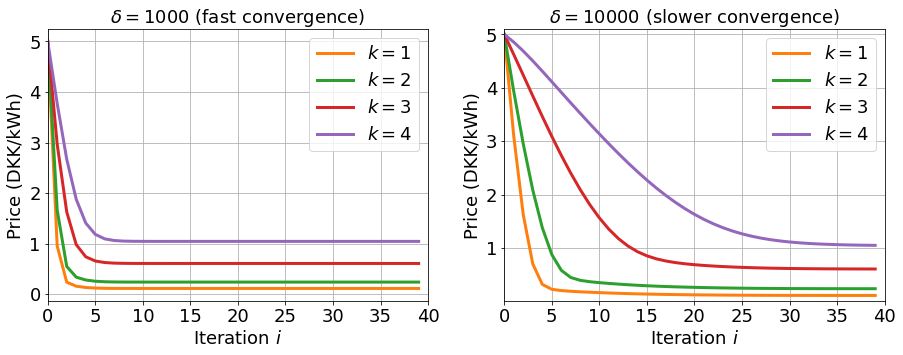

In [ ]:
#使用分布式算法
T,N,K=1,2000,4
B,G=np.zeros(N),np.zeros((K,T))
B[0:400],B[400:800],B[800:1200],B[1200:1600],B[1600:2000]=4,5,6,7,8


G[0,:],G[1,:],G[2,:],G[3,:]=(36/59)*E_total/T,(16/59)*E_total/T,(5/59)*E_total/T,(2/59)*E_total/T#不同来源能源占比设置


Max_iter=40
P,demand=np.ones([K,T])*5,np.zeros((N))
P_in,demand_in=np.ones([K,T])*5,np.zeros((N))

#Logging prices for each iteration for each company 记录每个公司每次迭代的价格 
P_iter_1,P_iter_2,P_iter_3,P_iter_4=np.ones(Max_iter),np.ones(Max_iter),np.ones(Max_iter),np.ones(Max_iter)

# computing the prices with delta=1000. 

delta=1000
for i in range(Max_iter):
    if i==0:#第一次迭代进行初始化
        P_iter_1[i]=P_in[0,0]
        P_iter_2[i]=P_in[1,0]
        P_iter_3[i]=P_in[2,0]
        P_iter_4[i]=P_in[3,0]
    else:    
        for t in range(T):
            for k in range(K):
                for n in range(N):
                    demand[n]=d(n+1,k+1,t+1)#计算新加入的价格
                epsilon=(G[k,t]+N)/P[k,t]+delta
                P[k,t]=P[k,t]+(np.sum(demand)-G[k,t])/epsilon#根据公式进行价格更新
        P_iter_1[i]=P[0,0]#存放本次迭代的价格
        P_iter_2[i]=P[1,0]
        P_iter_3[i]=P[2,0]
        P_iter_4[i]=P[3,0]

    
# Visualizing the outcomes

#数据可视化
plt.figure(figsize=(15, 5))    

ax = plt.subplot(121)

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    

# plt.ylim(np.min([P_iter_1,P_iter_2,P_iter_3,P_iter_4])-0.1,np.max([P_iter_1,P_iter_2,P_iter_3,P_iter_4])+0.1)
plt.xlim(0,Max_iter,1)  
plt.xticks(fontsize=18)    
plt.yticks(fontsize=18)    

        
plt.plot(P_iter_1[:],color='C%s'%(1),label='$k=1$',linewidth=3)
plt.plot(P_iter_2[:],color='C%s'%(2),label='$k=2$',linewidth=3)
plt.plot(P_iter_3[:],color='C%s'%(3),label='$k=3$',linewidth=3)
plt.plot(P_iter_4[:],color='C%s'%(4),label='$k=4$',linewidth=3)
plt.grid(True)    
plt.ylabel('Price (DKK/kWh)',fontsize=18)
plt.xlabel('Iteration $i$',fontsize=18)
plt.title('$\delta=1000$ (fast convergence)',fontsize=18)
plt.legend(fontsize=18,loc='best')

#修改delta值为10000进行迭代 步骤同上
# # Increase delta to 10000 
#Logging prices for each iteration for each company
P_iter_1,P_iter_2,P_iter_3,P_iter_4=np.ones(Max_iter),np.ones(Max_iter),np.ones(Max_iter),np.ones(Max_iter)

P,demand=np.ones([K,T])*5,np.zeros((N))
delta=10000
for i in range(Max_iter):
    if i==0:
        P_iter_1[i]=P_in[0,0]
        P_iter_2[i]=P_in[1,0]
        P_iter_3[i]=P_in[2,0]
        P_iter_4[i]=P_in[3,0]
    else:    
        for t in range(T):
            for k in range(K):
                for n in range(N):
                    demand[n]=d(n+1,k+1,t+1)
                epsilon=(G[k,t]+N)/P[k,t]+delta
                P[k,t]=P[k,t]+(np.sum(demand)-G[k,t])/epsilon
        P_iter_1[i]=P[0,0]
        P_iter_2[i]=P[1,0]
        P_iter_3[i]=P[2,0]
        P_iter_4[i]=P[3,0]

    

#进行数据可视化，对比不同参数效果
# Plot the prices 

ax = plt.subplot(122)
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    

plt.ylim(np.min([P_iter_1,P_iter_2,P_iter_3,P_iter_4])-0.1,np.max([P_iter_1,P_iter_2,P_iter_3,P_iter_4])+0.1)
plt.xlim(0,Max_iter,1)  
plt.xticks(fontsize=18)    
plt.yticks(fontsize=18)    
  

        
plt.plot(P_iter_1[:],color='C%s'%(1),label='$k=1$',linewidth=3)
plt.plot(P_iter_2[:],color='C%s'%(2),label='$k=2$',linewidth=3)
plt.plot(P_iter_3[:],color='C%s'%(3),label='$k=3$',linewidth=3)
plt.plot(P_iter_4[:],color='C%s'%(4),label='$k=4$',linewidth=3)

plt.grid(True)    
plt.ylabel('Price (DKK/kWh)',fontsize=18)
plt.xlabel('Iteration $i$',fontsize=18)
plt.legend(fontsize=18,loc='best')
plt.title('$\delta=10000$ (slower convergence)',fontsize=18)


# # Divergence 

# P,demand=np.random.rand(K,T)*5,np.zeros((N))
# delta=-10000
# for i in range(Max_iter):
#     for t in range(T):
#         for k in range(K):
#             for n in range(N):
#                 demand[n]=d(n+1,k+1,t+1)
#             epsilon=(G[k,t]+N)/P[k,t]+delta
#             P[k,t]=P[k,t]+(np.sum(demand)-G[k,t])/epsilon
#     P_iter_1[i]=P[0,0]
#     P_iter_2[i]=P[1,0]
#     P_iter_3[i]=P[2,0]
#     P_iter_4[i]=P[3,0]


# ax = plt.subplot(133)

  
# ax.get_xaxis().tick_bottom()    
# ax.get_yaxis().tick_left()    

# plt.ylim(np.min([P_iter_1,P_iter_2,P_iter_3,P_iter_4])-0.1,np.max([P_iter_1,P_iter_2,P_iter_3,P_iter_4])+0.1)
# plt.xlim(0,Max_iter,1)  
# plt.xticks(fontsize=18)    
# plt.yticks(fontsize=18)    
  

        
# plt.plot(P_iter_1[:],color='C%s'%(1),label='$k=1$',linewidth=3)
# plt.plot(P_iter_2[:],color='C%s'%(2),label='$k=2$',linewidth=3)
# plt.plot(P_iter_3[:],color='C%s'%(3),label='$k=3$',linewidth=3)
# plt.plot(P_iter_4[:],color='C%s'%(4),label='$k=4$',linewidth=3)

# plt.grid(True)    
# plt.ylabel('Price ($DKK/MWh$)',fontsize=18)
# plt.xlabel('Iteration $i$',fontsize=18)
# plt.legend(fontsize=18,loc='best')
# plt.title('$\delta=-10000$ (divergence)',fontsize=18)
# plt.ticklabel_format(style='sci', fontsize=30, axis='y', scilimits=(0,0))

plt.savefig('algorithm.pdf')


## 3. Case Study: Dutch Smart Grid Pilot

案例研究:荷兰智能电网试点

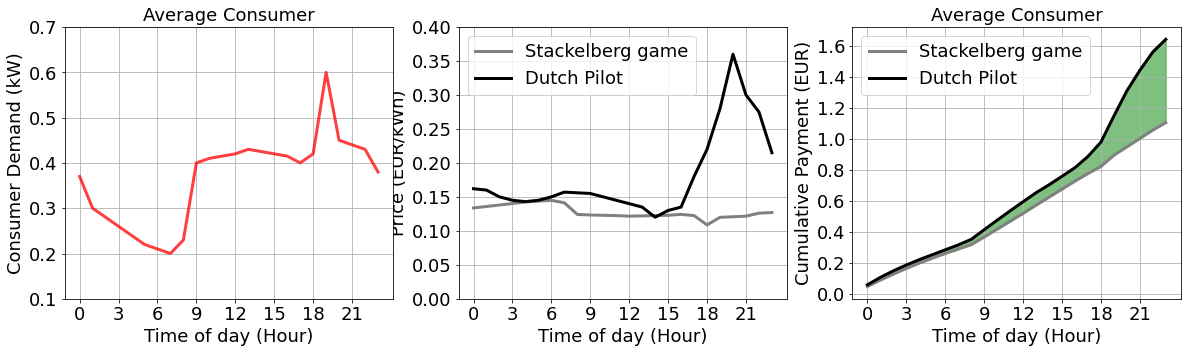

In [ ]:
T,N,K=24,77,1#T：时间 ；N：消费者；K：公司；
B,G,P,P_Eco,Payment_Stackelberg,Payment_Eco=np.zeros(N),np.zeros((K,T)),np.zeros((K,T)),np.zeros((K,T)),np.zeros((T)),np.zeros((T))


# Flexible Power from Dutch pilot [Watts]
G=([300,280,260,240,
    220,210,200,230,
    400,410,415,420,
    430,425,420,415,
    400,420,600,450,
    440,430,380,370])

# convert to kW and reshape  从定理1中找到必要的预算
G=77*np.reshape(G,(K,T))/1000

# Prices from Dutch pilot [EUR/kWh] 荷兰试点价格[欧元/千瓦时]

P_Eco=([0.162,0.16,0.15,0.145,0.143,
       0.145,0.15,0.157,0.156,
       0.155,0.15,0.145,0.14,
       0.135,0.12,0.13,0.135,
       0.18,0.22,0.28,0.36,
       0.3,0.275,0.215])

P_Eco=np.reshape(P_Eco,(K,T))

E_total=np.sum(G)

# Find necessary budgets from Theorem 1 从定理1中找到必要的预算
B[0:N]=(((E_total/N+K*T)/np.sum(1/(K*T*P_Eco)))-np.sum(P_Eco))



# Optimal Prices 最优价格
for t in range(T):
    for k in range(K):
        P[k,t]=p(k+1,t+1)

# Visualizing prices 可视化的价格
plt.figure(figsize=(20,5))    
ax = plt.subplot(132)

plt.ylim(0,.4)
plt.xticks(np.arange(0, T, 3))
plt.xticks(fontsize=18)    
plt.yticks(fontsize=18)    


plt.plot(P[0,:],color='grey',label='Stackelberg game',linewidth=3)
plt.plot(P_Eco[0,:],color='k',label='Dutch Pilot',linewidth=3,alpha=1)
plt.grid(True)    
plt.ylabel('Price (EUR/kWh)',fontsize=18)
plt.xlabel('Time of day (Hour)',fontsize=18)
plt.legend(fontsize=18,loc='best')



# Visualizing demand  可视化的需求
ax = plt.subplot(131)

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    

   
dd=np.zeros(T)
for i in range(T):
    dd[i]=d(1,1,i)#需求计算

    
# plt.plot(G[0,:],color='g',label='Power availability',linewidth=3)
plt.plot(dd,color='r',linewidth=3,alpha=0.75)
plt.grid(True)    
plt.ylabel('Consumer Demand (kW)',fontsize=18)
plt.xlabel('Time of day (Hour)',fontsize=18)
plt.title('Average Consumer',fontsize=18)
# plt.legend(fontsize=18,loc='best')
plt.ylim(np.min(dd)-0.1,np.max(dd)+.10)
plt.xticks(np.arange(0, T, 3))
plt.xticks(fontsize=18)    
plt.yticks(fontsize=18) 

ax = plt.subplot(133)

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    

   
for t in range(T):
    Payment_Stackelberg[t]=Payment_Stackelberg[t-1]+dd[t]*P[0,t]#计算经过斯塔克尔伯格博弈的价格
    Payment_Eco[t]=Payment_Eco[t-1]+dd[t]*P_Eco[0,t]#计算原始价格

plt.grid(True)    

plt.ylabel('Cumulative Payment (EUR)',fontsize=18)
plt.xlabel('Time of day (Hour)',fontsize=18)
plt.plot(Payment_Stackelberg[:],color='grey',label='Stackelberg game',linewidth=3)
plt.plot(Payment_Eco[:],color='k',label='Dutch Pilot',linewidth=3)

i=np.zeros([T])
for j in range(T):
    i[j]=j

ax.fill_between(i,Payment_Eco,Payment_Stackelberg,alpha=0.5, color='green')

plt.title('Average Consumer',fontsize=18)
plt.legend(fontsize=18,loc='best')
plt.xticks(np.arange(0, T, 3))
plt.xticks(fontsize=18)    
plt.yticks(fontsize=18) 





plt.savefig('Netherlands_Price_Power.pdf')

In [ ]:
print(E_total/N,B[0])

8.764999999999999 1.1005809229647268


### 3.1 Distributed Algorithm


分布式算法



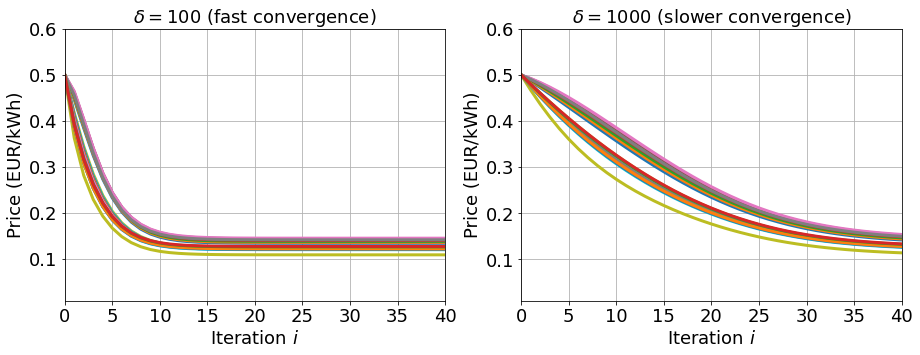

In [ ]:

#Convergence of the Algorithm 算法的收敛性
Max_iter=50

plt.figure(figsize=(15, 5))    

ax = plt.subplot(121)


#Logging prices for each iteration for each period 记录每个周期的每个迭代的价格 
P_iter=np.zeros([T,Max_iter])
P,demand=np.ones([K,T])/2,np.zeros((N))


#delta值为10进行迭代
delta,k=100,0
for i in range(Max_iter):
    if i==0:
        P_iter[:,i]=P
    else:    
        for t in range(T):
            for k in range(K):
                for n in range(N):
                    demand[n]=d(n+1,k+1,t+1)
                epsilon=(G[k,t]+N)/P[k,t]+delta
                P[k,t]=P[k,t]+(np.sum(demand)-G[k,t])/epsilon#价格更新公式
        P_iter[:,i]=P
    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    

plt.ylim(np.min([P_iter])-0.1,np.max([P_iter])+0.1)
plt.xlim(0,40,1)  
plt.xticks(fontsize=18)    
plt.yticks(fontsize=18) 


for i in range(T):
    plt.plot(P_iter[i,:],linewidth=3)
        
plt.ylabel('Price (EUR/kWh)',fontsize=18)
plt.xlabel('Iteration $i$',fontsize=18)
plt.title('$\delta=100$ (fast convergence)',fontsize=18)

plt.grid(True)    


ax = plt.subplot(122)


#Logging prices for each iteration for each period  记录每个周期的每个迭代的价格 
P_iter=np.zeros([T,Max_iter])


P,demand=np.ones([K,T])/2,np.zeros((N))
#delta值为1000进行迭代
delta,k=1000,0
for i in range(Max_iter):
    if i==0:
        P_iter[:,i]=P
    else:    
        for t in range(T):
            for k in range(K):
                for n in range(N):
                    demand[n]=d(n+1,k+1,t+1)
                epsilon=(G[k,t]+N)/P[k,t]+delta
                P[k,t]=P[k,t]+(np.sum(demand)-G[k,t])/epsilon
        P_iter[:,i]=P
    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    

plt.ylim(np.min([P_iter])-0.1,np.max([P_iter])+0.1)
plt.xlim(0,40,1)  
plt.xticks(fontsize=18)    
plt.yticks(fontsize=18) 


for i in range(T):
    plt.plot(P_iter[i,:],linewidth=3)
        
plt.ylabel('Price (EUR/kWh)',fontsize=18)
plt.xlabel('Iteration $i$',fontsize=18)
plt.title('$\delta=1000$ (slower convergence)',fontsize=18)

plt.grid(True)    


# ax = plt.subplot(133)


# #Logging prices for each iteration for each period
# P_iter=np.zeros([T,Max_iter])


# P,demand=np.random.rand(K,T),np.zeros((N))
# delta,k=-1000,0
# for i in range(Max_iter):
#     for t in range(T):
#         for n in range(N):
#             demand[n]=d(n+1,k+1,t+1)
#         epsilon=(G[k,t]+N)/P[k,t]+delta
#         P[k,t]=P[k,t]+(np.sum(demand)-G[k,t])/epsilon
#         P_iter[t,i]=P[k,t]
    
# ax.get_xaxis().tick_bottom()    
# ax.get_yaxis().tick_left()    

# plt.ylim(np.min([P_iter])-0.1,np.max([P_iter])+0.1)
# plt.xlim(0,40,1)  
# plt.xticks(fontsize=18)    
# plt.yticks(fontsize=18) 


# for i in range(T):
#     plt.plot(P_iter[i,:],linewidth=3)
        
# plt.ylabel('Price (EUR/kWh)',fontsize=18)
# plt.xlabel('Iteration $i$',fontsize=18)
# plt.title('$\delta=-1000$ (divergence)',fontsize=18)
# plt.xticks(fontsize=18)    
# plt.yticks(fontsize=18) 


plt.grid(True)    

plt.savefig('algorithm2.pdf')


##### References 
K. Alshehri, J. Liu, X. Chen, and T. Başar. A Stackelberg game for multi-period demand response management in the smart grid. Proc. 54th IEEE Conference on Decision and Control (CDC'15, Dec 15-18, 2015; Osaka, Japan), pp. 5889-5894.


K. Alshehri, J. Liu, X. Chen, and T. Başar. A Game-Theoretic Method for Multi-Period Demand Response: Revenue Maximization, Power Allocation, and Asymptotic Behavior. https://arxiv.org/abs/1710.00145

